In [1]:
#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import ensemble
from collections import defaultdict
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from mpl_toolkits.mplot3d import Axes3D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('CompsData.csv', names=['Company', 'Type','Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin'])
df.head()
df = df.drop([0],axis=0)
df[['Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']] = df[['Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']].apply(pd.to_numeric)
x = df[['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']]
a = df[['Rev Growth','GP Margin','EBITDA Margin']]
b = df[['Rev Growth','GP Margin','S&M Margin','EBITDA Margin']]
c = df[['Rev Growth','GP Margin']]
d = df[['GP Margin']]
e = df[['Rev Growth']]
f = df[['Rev Growth','GP Margin','R&D Margin']]
g = df[['Rev Growth','GP Margin','S&M Margin']]
h = df[['R&D Margin']]
i = df[['S&M Margin']]
j = df[['EBITDA Margin']]
k = df[['Profit Margin']]
y = df[['Ev/Rev Multiple']]
databricks = [0.951862931344295,0.671300585943595,0.577080777881529,0.981899434820076,0.261273981475219,-1.14895360823323,-1.11333236039661]
db = pd.DataFrame([databricks], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
db = db.drop(['G&A Margin'], axis=1)
db2 = db.drop(['R&D Margin', 'S&M Margin','EBITDA Margin', 'Profit Margin'],axis=1)

In [3]:
db2

,Rev Growth,GP Margin
0,0.951863,0.671301


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)  
model2 = ensemble.AdaBoostRegressor(random_state=0)
model2 = model2.fit(x_train,y_train.values.ravel())

In [18]:
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test,y_test)

0.04362357958239038

In [19]:
model.score(x_test,y_test)

0.04362357958239038

In [14]:
model2.score(x_test,y_test)

0.2548467569077586

In [110]:
variables = [x,a,b,c,d,e,f,g]
for q in variables:
    x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.1, random_state=0)  
    model = LinearRegression()
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    print (model.score(x_test,y_test))

0.04362357958239038
0.23842461765325773
0.10195635171722817
0.21239103880450472
0.07656866223837211
0.18103184682571594
0.21221818947457327
0.17841500123274712


In [111]:
model2 = ensemble.AdaBoostRegressor(random_state=0)

In [112]:
model2 = model2.fit(x_train,y_train.values.ravel())

In [85]:
model2.score(x_test,y_test)

0.4801873543899191

In [87]:
variables = [x,a,b,c,d,e,f,g]
for q in variables:
    x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.1, random_state=0)  
    model2 = ensemble.AdaBoostRegressor(random_state=0)
    model2.fit(x_train,y_train.values.ravel())
    model2.score(x_test,y_test)
    print (model2.score(x_test,y_test))

0.5871438704764522
0.4336304514205437
0.42749987942063805
0.28648786002779236
0.035986845542658075
0.2151830866128951
0.4638920272744359
0.4801873543899191


In [88]:
variables = [x,a,b,c,d,e,f,g] 
data = []
state = range (10)
for w in state:
    col = []
    for q in variables:
        x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.1, random_state=0)  
        model2 = ensemble.AdaBoostRegressor(random_state=w)
        model2.fit(x_train,y_train.values.ravel())
        model2.score(x_test,y_test)
        col.append(model2.score(x_test,y_test))
    data.append(col)

In [89]:
print (data)

[[0.5871438704764522, 0.4336304514205437, 0.42749987942063805, 0.28648786002779236, 0.035986845542658075, 0.2151830866128951, 0.4638920272744359, 0.4801873543899191], [0.6278500813553536, 0.5115873296247042, 0.578515355677684, 0.3495937828389909, 0.03377748072116238, 0.20275179543299127, 0.4521580440574746, 0.4007893617933479], [0.595214988080186, 0.5329556211741913, 0.3870280451157747, 0.39439166439348416, 0.14746481785469523, 0.2168306531856633, 0.5415245408083839, 0.40917627756831276], [0.6039887863992615, 0.5474826732526948, 0.39351885041496826, 0.37615806031284404, -0.15844908897097976, 0.18184185813901665, 0.5040363030447486, 0.5109559386773324], [0.5659049001069766, 0.4800029479265908, 0.5712506244297628, 0.460382140555163, -0.16665933320914394, 0.22917456845890405, 0.4449865014553659, 0.4280171485977241], [0.5513234411786085, 0.4876482221651689, 0.44026747728651383, 0.4550258898280458, 0.047203700053783715, 0.32078891315375624, 0.3512460236767957, 0.4169468999049266], [0.589579

In [90]:
variables = [x,a,b,c,d,e,f,g] 
state = range (10)
newdata={}
for w in state:
    col = []
    for q in variables:
        x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.1, random_state=0)  
        model2 = ensemble.AdaBoostRegressor(random_state=w)
        model2.fit(x_train,y_train.values.ravel())
        model2.score(x_test,y_test)
        col.append(model2.score(x_test,y_test))
        newdata["State{}".format(w)] = col

In [91]:
newcol = pd.DataFrame (newdata)

In [92]:
newcol.idxmax()

State0    0
State1    0
State2    0
State3    0
State4    2
State5    0
State6    0
State7    0
State8    0
State9    0
dtype: int64

In [93]:
newcol

,State0,State1,State2,State3,State4,State5,State6,State7,State8,State9
0,0.587144,0.627850,0.595215,0.603989,0.565905,0.551323,0.589580,0.595496,0.587494,0.610874
1,0.433630,0.511587,0.532956,0.547483,0.480003,0.487648,0.440009,0.495406,0.412369,0.496321
2,0.427500,0.578515,0.387028,0.393519,0.571251,0.440267,0.510747,0.549761,0.489271,0.545405
3,0.286488,0.349594,0.394392,0.376158,0.460382,0.455026,0.324878,0.354538,0.274605,0.381632
4,0.035987,0.033777,0.147465,-0.158449,-0.166659,0.047204,0.161047,-0.348486,0.041116,0.016208
5,0.215183,0.202752,0.216831,0.181842,0.229175,0.320789,0.099373,0.281370,0.329194,0.403757
6,0.463892,0.452158,0.541525,0.504036,0.444987,0.351246,0.549279,0.413924,0.385271,0.531168
7,0.480187,0.400789,0.409176,0.510956,0.428017,0.416947,0.455210,0.394853,0.501045,0.444704


Text(0,0.5,'Predictions')

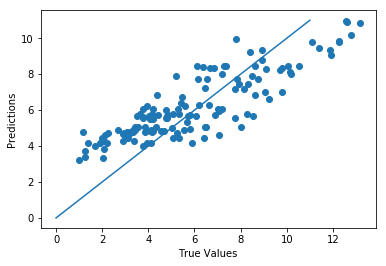

In [445]:
x23 = range(12)
y23 = range(12)
h = model2.predict(x)
plt.scatter(y,h)
plt.plot(x23,y23)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [451]:
model.score(x,y)

0.1977907680592781

In [447]:
model2

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=0)

In [406]:
model2.predict(db)

array([10.09176289])

In [407]:
y_1 = model2.predict(x_test)
y_4 = model.predict(x_test)

In [408]:
y_2 = y_test.values
x_1 = range(14)

In [409]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

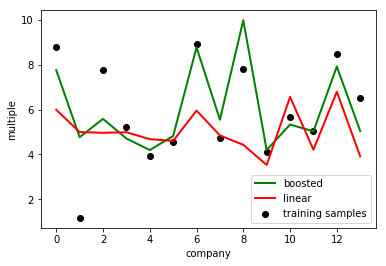

In [410]:
plt.figure()
plt.scatter(x_1,y_2, c="k", label="training samples")
plt.plot(x_1, y_1, c="g", label="boosted", linewidth=2)
plt.plot(x_1, y_4, c="r", label="linear", linewidth=2)
plt.xlabel("company")
plt.ylabel("multiple")
plt.legend()
plt.show()

In [434]:
y_1 = model2.predict(x)
y_4 = model.predict(x)
y_2 = y.values
x_1 = range(136)

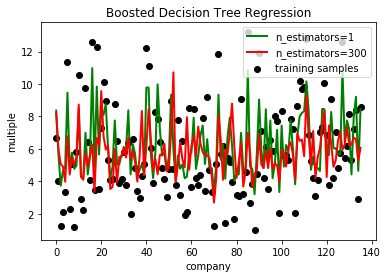

In [328]:
plt.figure()
plt.scatter(x_1,y_2, c="k", label="training samples")
plt.plot(x_1, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(x_1, y_4, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("company")
plt.ylabel("multiple")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [459]:
y_1 = model2.predict(x)
y_4 = model.predict(x)
y_2 = y.values
y_3 = d.values
y_5 = e.values
y_6 = h.values
y_7 = i.values
y_8 = j.values
y_9 = k.values
x_1 = range(136)

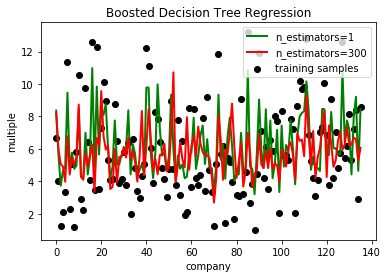

In [331]:
plt.figure()
plt.scatter(x_1,y_2, c="k", label="training samples")
plt.plot(x_1, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(x_1, y_4, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("company")
plt.ylabel("multiple")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

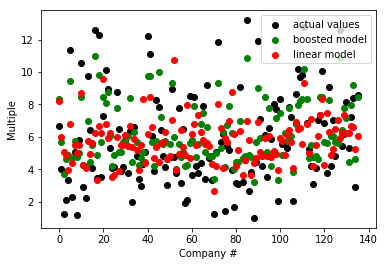

In [332]:
plt.figure()
plt.scatter(x_1,y_2, c="k", label="actual values")
plt.scatter(x_1,y_1, c="g", label="boosted model")
plt.scatter(x_1,y_4, c="r", label="linear model")
plt.xlabel("Company #")
plt.ylabel("Multiple")
plt.legend()
plt.show()

In [468]:
model.predict(db)

array([[9.58948542]])

In [469]:
model2.predict(db)

array([10.09176289])

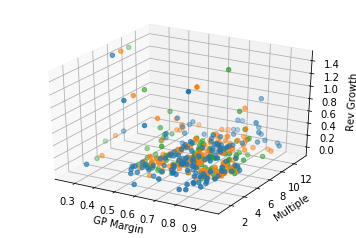

In [335]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = y_2,y_3,y_5 #Multiple, GP Margin, Rev Growth
ax.scatter(Y,X,Z)
A, B = y_1, y_4
ax.scatter(Y,A,Z)
ax.scatter(Y,B,Z)
ax.set_xlabel('GP Margin')
ax.set_ylabel('Multiple')
ax.set_zlabel('Rev Growth')
plt.show() 

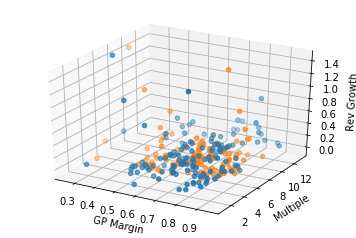

In [336]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = y_2,y_3,y_5 #Multiple, GP Margin, Rev Growth
ax.scatter(Y,X,Z)
A, B = y_1, y_4
ax.scatter(Y,B,Z)
ax.set_xlabel('GP Margin')
ax.set_ylabel('Multiple')
ax.set_zlabel('Rev Growth')
plt.show() 

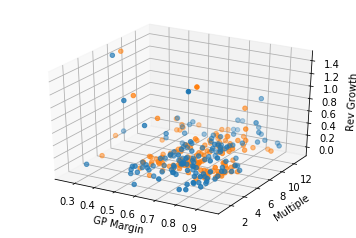

In [337]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = y_2,y_3,y_5 #Multiple, GP Margin, Rev Growth
ax.scatter(Y,X,Z)
A, B = y_1, y_4
ax.scatter(Y,A,Z)
ax.set_xlabel('GP Margin')
ax.set_ylabel('Multiple')
ax.set_zlabel('Rev Growth')
plt.show() 

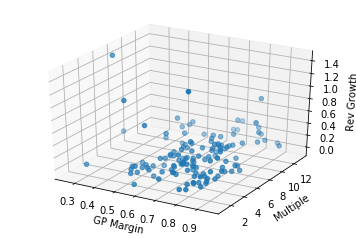

In [338]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = y_2,y_3,y_5 #Multiple, GP Margin, Rev Growth
ax.scatter(Y,X,Z)
A, B = y_1, y_4
ax.set_xlabel('GP Margin')
ax.set_ylabel('Multiple')
ax.set_zlabel('Rev Growth')
plt.show() 

In [411]:
model2.score(x,y)

0.6783821224741304

In [412]:
model.score(x,y)

0.1977907680592781

In [365]:
model2.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 0}

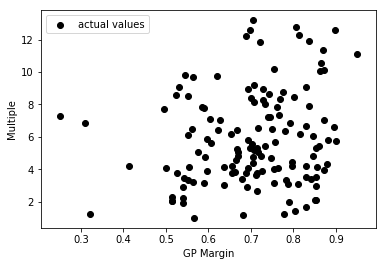

In [456]:
plt.figure()
plt.scatter(y_3,y_2, c="k", label="actual values")
plt.xlabel("GP Margin")
plt.ylabel("Multiple")
plt.legend()
plt.show()

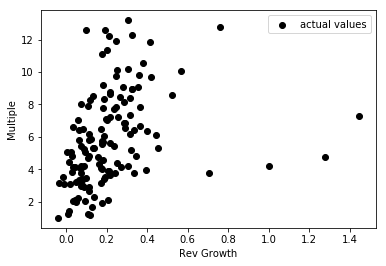

In [457]:
plt.figure()
plt.scatter(y_5,y_2, c="k", label="actual values")
plt.xlabel("Rev Growth")
plt.ylabel("Multiple")
plt.legend()
plt.show()

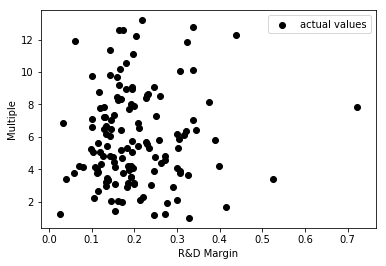

In [461]:
plt.figure()
plt.scatter(y_6,y_2, c="k", label="actual values")
plt.xlabel("R&D Margin")
plt.ylabel("Multiple")
plt.legend()
plt.show()

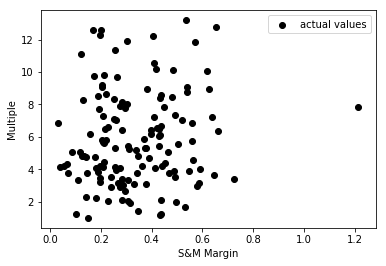

In [462]:
plt.figure()
plt.scatter(y_7,y_2, c="k", label="actual values")
plt.xlabel("S&M Margin")
plt.ylabel("Multiple")
plt.legend()
plt.show()

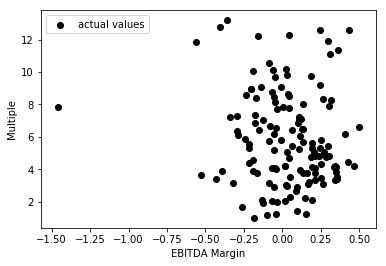

In [463]:
plt.figure()
plt.scatter(y_8,y_2, c="k", label="actual values")
plt.xlabel("EBITDA Margin")
plt.ylabel("Multiple")
plt.legend()
plt.show()

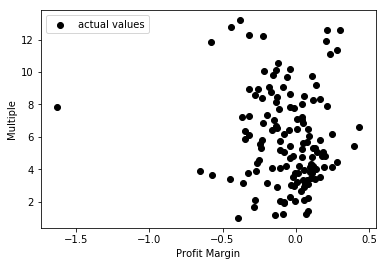

In [464]:
plt.figure()
plt.scatter(y_9,y_2, c="k", label="actual values")
plt.xlabel("Profit Margin")
plt.ylabel("Multiple")
plt.legend()
plt.show()